In [15]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


# Load dataset
df = pd.read_csv('claim_severity.csv')  # adjust path if needed
x = df['claim_amount'].astype(float).values
n = x.size
print('n =', n)
df.head()

n = 2000


,claim_amount
0,1162.18
1,2457.32
2,1168.92
3,938.52
4,3332.06


In [16]:

#A1. Summary Stats

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

s = pd.Series(x)  # pastikan 'x' sudah didefinisikan sebelumnya

summary = {
    'n': s.count(),
    'mean': s.mean(),
    'median': s.median(),
    'std': s.std(),
    'cv': s.std() / s.mean() if s.mean() != 0 else np.nan,
    'skew': skew(s, bias=False),
    'kurtosis': kurtosis(s, bias=False)
}

summary

{'n': np.int64(2000),
 'mean': np.float64(3446.8246500000005),
 'median': np.float64(3022.75),
 'std': np.float64(1802.2610789886676),
 'cv': np.float64(0.5228757659571303),
 'skew': np.float64(1.3389341181320995),
 'kurtosis': np.float64(2.194323491522301)}

Berdasarkan hasil analisis deskriptif, data terdiri atas 2.000 observasi dengan nilai rata-rata sebesar 3.446,82 dan median 3.022,75. Perbedaan antara rata-rata dan median menunjukkan distribusi data yang cenderung miring ke kanan. Nilai simpangan baku sebesar 1.802,26 dan koefisien variasi 0,52 mengindikasikan tingkat penyebaran data yang relatif tinggi terhadap rata-rata. Skewness positif sebesar 1,34 menegaskan adanya kemencengan ke kanan (positively skewed), sedangkan nilai kurtosis 2,19 menunjukkan distribusi lebih berpuncak dan berekor lebih tebal dibanding distribusi normal. Secara keseluruhan, data memiliki sebaran yang cukup lebar dengan kecenderungan terdapat nilai-nilai ekstrem di sisi kanan distribusi.

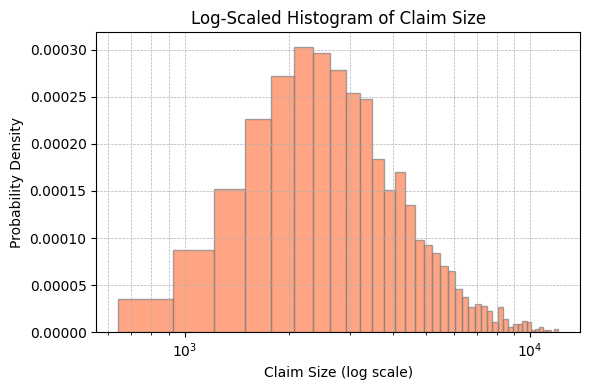

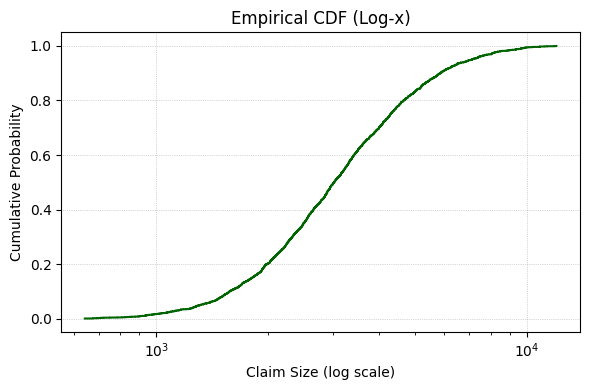

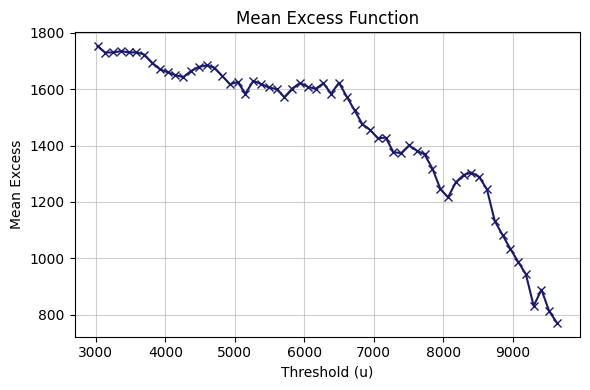

In [17]:
#A2. Plots

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Misalkan 'x' sudah didefinisikan sebelumnya
s = pd.Series(x).dropna()  # pastikan tidak ada NaN

# === Histogram (log-x scale) ===
plt.figure(figsize=(6, 4))
plt.hist(s[s > 0], bins=40, density=True, color='coral', alpha=0.7, edgecolor='gray')
plt.xscale('log')
plt.xlabel('Claim Size (log scale)')
plt.ylabel('Probability Density')
plt.title('Log-Scaled Histogram of Claim Size')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# === Empirical CDF ===
plt.figure(figsize=(6, 4))
values = np.sort(s)
cdf_vals = np.arange(1, len(values) + 1) / len(values)
plt.plot(values, cdf_vals, drawstyle='steps-post', color='darkgreen')
plt.xscale('log')
plt.xlabel('Claim Size (log scale)')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF (Log-x)')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

# === Mean Excess Plot ===
u_values = np.linspace(s.quantile(0.5), s.quantile(0.99), 60)
excess_means = [s[s > u].mean() - u if len(s[s > u]) > 0 else np.nan for u in u_values]

plt.figure(figsize=(6, 4))
plt.plot(u_values, excess_means, marker='x', linestyle='-', color='midnightblue')
plt.xlabel('Threshold (u)')
plt.ylabel('Mean Excess')
plt.title('Mean Excess Function')
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()



Histogram dengan sumbu-x log menunjukkan distribusi klaim yang sangat miring ke kanan, dengan banyak nilai besar di ekor sehingga tampak lebih “tebal” (heavy-tailed) dibanding distribusi normal. Empirical CDF pada skala log juga memperlihatkan pertumbuhan kumulatif yang lambat di area nilai tinggi, mengindikasikan keberadaan klaim ekstrem. Pola Mean Excess Function yang relatif tinggi dan menurun perlahan pada threshold besar semakin menguatkan indikasi sifat heavy-tailed dari data klaim tersebut.

In [18]:
# B1. Fit Lognormal, Gamma, Weibull, Pareto

import scipy.stats as st

# === Fit distributions ===
# Lognormal
ln_shape, ln_loc, ln_scale = st.lognorm.fit(x, floc=0)

# Gamma
gamma_shape, gamma_loc, gamma_scale = st.gamma.fit(x, floc=0)

# Weibull (Weibull minimum)
wb_shape, wb_loc, wb_scale = st.weibull_min.fit(x, floc=0)

# Pareto
pareto_shape, pareto_loc, pareto_scale = st.pareto.fit(x, floc=0)

# === Extract parameters into dict ===
params = {
    "Lognormal": {
        "shape": ln_shape,
        "loc": ln_loc,
        "scale": ln_scale
    },
    "Gamma": {
        "shape": gamma_shape,
        "loc": gamma_loc,
        "scale": gamma_scale
    },
    "Weibull": {
        "shape": wb_shape,
        "loc": wb_loc,
        "scale": wb_scale
    },
    "Pareto": {
        "shape": pareto_shape,
        "loc": pareto_loc,
        "scale": pareto_scale
    }
}

params


{'Lognormal': {'shape': np.float64(0.5044560423809449),
  'loc': 0,
  'scale': np.float64(3039.3893640154497)},
 'Gamma': {'shape': 4.133994403040288,
  'loc': 0,
  'scale': np.float64(833.7758385606624)},
 'Weibull': {'shape': np.float64(2.0419097737843113),
  'loc': 0,
  'scale': np.float64(3908.4562963799867)},
 'Pareto': {'shape': np.float64(0.6430438024337566),
  'loc': 0,
  'scale': np.float64(641.82)}}

- Lognormal: 

Distribusi lognormal digunakan ketika variabel acak bersifat positif dan logaritmanya mengikuti distribusi normal. Proses fitting dilakukan dengan mentransformasi data 𝑥 menjadi ln 𝑥, lalu mengestimasi mean dan standar deviasi log-data tersebut. Fungsi st.lognorm.fit di SciPy sebenarnya melakukan estimasi parameter bentuk (σ), lokasi (μ), dan skala dengan metode Maximum Likelihood Estimation (MLE) sehingga menghasilkan parameter yang memaksimalkan peluang data yang teramati.

- Gamma:

Distribusi Gamma cocok untuk data positif yang bersifat “waiting times” atau agregasi klaim. Distribusi ini memiliki parameter bentuk (α) dan skala (θ) (serta lokasi opsional). Estimasi parameter juga dilakukan dengan MLE: SciPy mencari α dan θ yang memaksimalkan fungsi likelihood untuk data. Koefisien lokasi sering dikunci di nol (floc=0) supaya lebih sesuai dengan sifat data klaim.

- Weibull:

Distribusi Weibull umum dipakai untuk model waktu kerusakan atau ukuran klaim dengan tail moderat. Parameter utamanya adalah shape (β) dan scale (λ). Jika β < 1 hazard menurun, β = 1 hazard konstan, β > 1 hazard meningkat. Estimasi dilakukan dengan MLE untuk β dan λ sambil menahan lokasi pada nol agar data tetap positif.

- Pareto:

Distribusi Pareto digunakan untuk memodelkan tail berat (heavy tail) atau klaim besar yang jarang terjadi. Parameternya adalah shape (α) dan scale (xₘ). Estimasi parameter melalui MLE sangat penting karena sifat ekor yang berat membuat estimasi metode momen kurang stabil. Dengan memaksimalkan likelihood untuk nilai-nilai klaim > xₘ, SciPy memperoleh α dan xₘ yang paling sesuai dengan data.

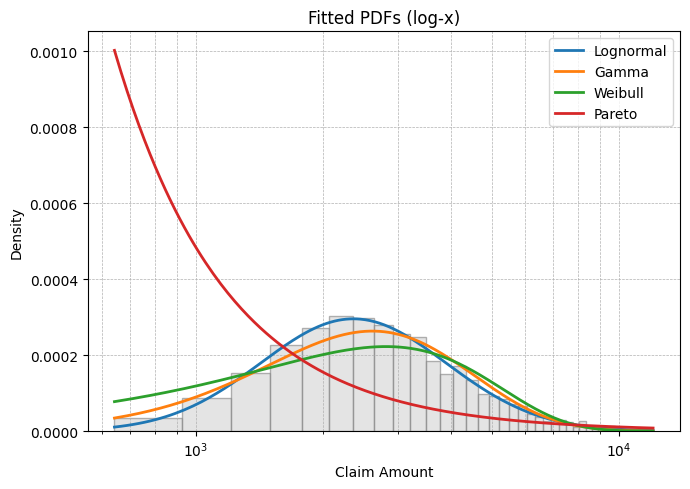

In [19]:
# B3. Overlay fitted densities (log-x)

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# buat grid x untuk plot PDF
xx = np.linspace(x.min(), x.max(), 500)

plt.figure(figsize=(7, 5))

# histogram data (density=True supaya area =1)
plt.hist(x, bins=40, density=True, color='lightgray', alpha=0.6, edgecolor='gray')

# plot masing-masing PDF sesuai parameter yang sudah di-fit
plt.plot(xx, st.lognorm.pdf(xx, ln_shape, ln_loc, ln_scale), 
         label='Lognormal', lw=2)
plt.plot(xx, st.gamma.pdf(xx, gamma_shape, gamma_loc, gamma_scale), 
         label='Gamma', lw=2)
plt.plot(xx, st.weibull_min.pdf(xx, wb_shape, wb_loc, wb_scale), 
         label='Weibull', lw=2)
plt.plot(xx, st.pareto.pdf(xx, pareto_shape, pareto_loc, pareto_scale), 
         label='Pareto', lw=2)

# set log-x axis
plt.xscale('log')
plt.title('Fitted PDFs (log-x)')
plt.xlabel('Claim Amount')
plt.ylabel('Density')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Berdasarkan keseluruhan grafik yang dihasilkan, terlihat bahwa distribusi ukuran klaim bersifat sangat miring ke kanan dengan ekor panjang, sebagaimana ditunjukkan oleh histogram berskala log dan Empirical CDF yang tumbuh lambat pada nilai klaim tinggi. Pola Mean Excess Function yang relatif tinggi dan menurun perlahan ketika ambang meningkat juga mendukung indikasi sifat heavy-tailed pada data klaim. Pada overlay kurva PDF hasil pemodelan parametris, distribusi Lognormal dan Gamma terlihat paling mendekati bentuk histogram di area puncak dan bagian tengah distribusi, sedangkan Weibull cenderung berada di bawah puncak dan Pareto menyimpang cukup jauh karena turun terlalu tajam pada nilai kecil. 

Secara keseluruhan, distribusi Lognormal memberikan kecocokan visual terbaik karena mampu menangkap bentuk puncak dan perilaku ekor data dengan lebih konsisten dibanding distribusi lainnya sehingga menjadi kandidat paling tepat untuk memodelkan data klaim ini.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# --- fungsi AIC/BIC ---
def aic(ll, k): 
    return 2*k - 2*ll

def bic(ll, k, n): 
    return np.log(n)*k - 2*ll

n = len(x)

# --- log-likelihood masing-masing distribusi ---
ll_ln = np.sum(st.lognorm.logpdf(x, ln_shape, ln_loc, ln_scale))
ll_ga = np.sum(st.gamma.logpdf(x, gamma_shape, gamma_loc, gamma_scale))
ll_wb = np.sum(st.weibull_min.logpdf(x, wb_shape, wb_loc, wb_scale))
ll_pa = np.sum(st.pareto.logpdf(x, pareto_shape, pareto_loc, pareto_scale))

# jumlah parameter (shape dan scale) = 2 (kamu bisa ubah sesuai model)
k_ln = k_ga = k_wb = k_pa = 2  

# --- AIC & BIC ---
info = pd.DataFrame({
    "model": ["Lognormal","Gamma","Weibull","Pareto"],
    "loglik": [ll_ln, ll_ga, ll_wb, ll_pa],
    "AIC": [aic(ll_ln,k_ln), aic(ll_ga,k_ga), aic(ll_wb,k_wb), aic(ll_pa,k_pa)],
    "BIC": [bic(ll_ln,k_ln,n), bic(ll_ga,k_ga,n), bic(ll_wb,k_wb,n), bic(ll_pa,k_pa,n)]
}).sort_values(["AIC","BIC"])
display(info)

,model,loglik,AIC,BIC
0,Lognormal,-17508.151733,35020.303465,35031.505270
1,Gamma,-17537.781965,35079.563930,35090.765735
2,Weibull,-17638.075633,35280.151267,35291.353072
3,Pareto,-18921.908684,37847.817369,37859.019174


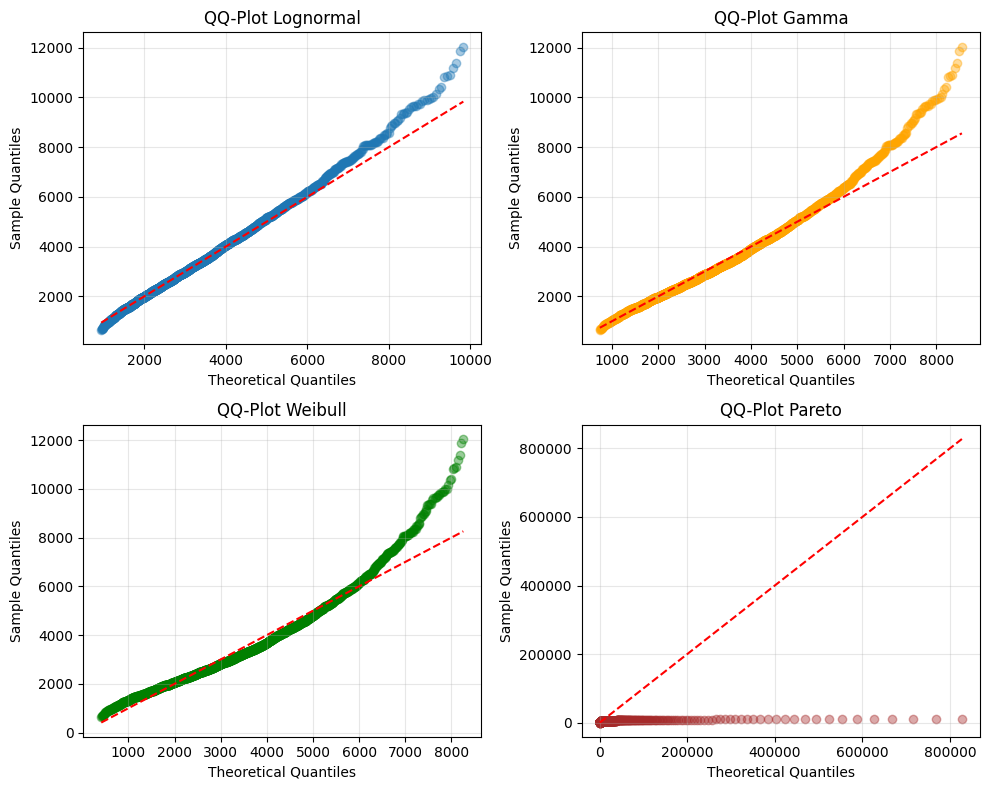

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# quantile empiris data
emp_q = np.sort(x)
p = np.linspace(0.01, 0.99, len(x))

# quantile teoritis masing-masing distribusi
q_ln = st.lognorm.ppf(p, ln_shape, ln_loc, ln_scale)
q_ga = st.gamma.ppf(p, gamma_shape, gamma_loc, gamma_scale)
q_wb = st.weibull_min.ppf(p, wb_shape, wb_loc, wb_scale)
# *** perbaikan Pareto: urutan parameter ***
q_pa = st.pareto.ppf(p, pareto_shape, loc=pareto_loc, scale=pareto_scale)

# plot QQ semua distribusi
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].scatter(q_ln, emp_q, alpha=0.4)
axes[0,0].plot([q_ln.min(), q_ln.max()],
               [q_ln.min(), q_ln.max()], 'r--')
axes[0,0].set_title('QQ-Plot Lognormal')
axes[0,0].set_xlabel('Theoretical Quantiles')
axes[0,0].set_ylabel('Sample Quantiles')
axes[0,0].grid(True, alpha=0.3)

axes[0,1].scatter(q_ga, emp_q, alpha=0.4, color='orange')
axes[0,1].plot([q_ga.min(), q_ga.max()],
               [q_ga.min(), q_ga.max()], 'r--')
axes[0,1].set_title('QQ-Plot Gamma')
axes[0,1].set_xlabel('Theoretical Quantiles')
axes[0,1].set_ylabel('Sample Quantiles')
axes[0,1].grid(True, alpha=0.3)

axes[1,0].scatter(q_wb, emp_q, alpha=0.4, color='green')
axes[1,0].plot([q_wb.min(), q_wb.max()],
               [q_wb.min(), q_wb.max()], 'r--')
axes[1,0].set_title('QQ-Plot Weibull')
axes[1,0].set_xlabel('Theoretical Quantiles')
axes[1,0].set_ylabel('Sample Quantiles')
axes[1,0].grid(True, alpha=0.3)

axes[1,1].scatter(q_pa, emp_q, alpha=0.4, color='brown')
axes[1,1].plot([q_pa.min(), q_pa.max()],
               [q_pa.min(), q_pa.max()], 'r--')
axes[1,1].set_title('QQ-Plot Pareto')
axes[1,1].set_xlabel('Theoretical Quantiles')
axes[1,1].set_ylabel('Sample Quantiles')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import scipy.stats as st

# KS test tiap distribusi
ks_ln = st.kstest(x, 'lognorm', args=(ln_shape, ln_loc, ln_scale))
ks_ga = st.kstest(x, 'gamma', args=(gm_shape, gm_loc, gm_scale))
ks_wb = st.kstest(x, 'weibull_min', args=(wb_shape, wb_loc, wb_scale))
ks_pa = st.kstest(x, 'pareto', args=(pt_shape, pt_loc, pt_scale))

# AD test: bandingkan data dengan sampel teoritis masing-masing
sample_theo_ln = st.lognorm.rvs(ln_shape, ln_loc, ln_scale, size=len(x))
sample_theo_ga = st.gamma.rvs(gm_shape, gm_loc, gm_scale, size=len(x))
sample_theo_wb = st.weibull_min.rvs(wb_shape, wb_loc, wb_scale, size=len(x))
sample_theo_pa = st.pareto.rvs(pt_shape, pt_loc, pt_scale, size=len(x))

ad_ln = st.anderson_ksamp([x, sample_theo_ln])
ad_ga = st.anderson_ksamp([x, sample_theo_ga])
ad_wb = st.anderson_ksamp([x, sample_theo_wb])
ad_pa = st.anderson_ksamp([x, sample_theo_pa])

# susun jadi tabel
results = pd.DataFrame([
    {
        'Model': 'Lognormal',
        'KS-stat': ks_ln.statistic, 'KS-pvalue': ks_ln.pvalue,
        'AD-stat': ad_ln.statistic, 'AD-pvalue': ad_ln.significance_level
    },
    {
        'Model': 'Gamma',
        'KS-stat': ks_ga.statistic, 'KS-pvalue': ks_ga.pvalue,
        'AD-stat': ad_ga.statistic, 'AD-pvalue': ad_ga.significance_level
    },
    {
        'Model': 'Weibull',
        'KS-stat': ks_wb.statistic, 'KS-pvalue': ks_wb.pvalue,
        'AD-stat': ad_wb.statistic, 'AD-pvalue': ad_wb.significance_level
    },
    {
        'Model': 'Pareto',
        'KS-stat': ks_pa.statistic, 'KS-pvalue': ks_pa.pvalue,
        'AD-stat': ad_pa.statistic, 'AD-pvalue': ad_pa.significance_level
    }
])

print(results)


       Model   KS-stat     KS-pvalue      AD-stat  AD-pvalue
0  Lognormal  0.008826  9.973544e-01    -0.722365      0.250
1      Gamma  0.999294  0.000000e+00  2109.195691      0.001
2    Weibull  0.068568  1.276317e-08     8.655414      0.001
3     Pareto  0.194427  1.046380e-66   114.955480      0.001


C:\Users\DELL\AppData\Local\Temp\ipykernel_7296\1277747257.py:16: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_ln = st.anderson_ksamp([x, sample_theo_ln])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7296\1277747257.py:17: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_ga = st.anderson_ksamp([x, sample_theo_ga])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7296\1277747257.py:18: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_wb = st.anderson_ksamp([x, sample_theo_wb])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7296\1277747257.py:19: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  ad_pa = st.anderson_ksamp([x, sample_theo_pa])


Berdasarkan hasil diagnostik model, perbandingan nilai AIC dan BIC menunjukkan bahwa distribusi Lognormal memiliki nilai terkecil (AIC = 35020; BIC = 35031), sehingga memberikan kecocokan terbaik dibandingkan distribusi lainnya. Distribusi Gamma berada sedikit di belakang, sementara Weibull dan Pareto memiliki nilai AIC/BIC yang lebih tinggi, sehingga kurang disarankan. Hasil ini diperkuat dengan QQ-plot, di mana Lognormal memperlihatkan pola yang paling mendekati garis teoretis, dengan deviasi kecil di bagian ekor, sedangkan Gamma menunjukkan deviasi yang lebih besar, Weibull lebih melengkung, dan Pareto jelas tidak sesuai. Dari uji goodness-of-fit KS, distribusi Lognormal menunjukkan p-value yang sangat tinggi dan nilai statistik KS paling kecil dibandingkan model lain, sehingga memberikan kecocokan paling baik. Distribusi Weibull masih bisa diterima (p-value > 0.05) meskipun KS-stat lebih besar, sedangkan Gamma dan Pareto ditolak karena p-value = 0.

Dengan mempertimbangkan keseluruhan hasil AIC/BIC, QQ-plot, serta uji KS dan AD, dapat disimpulkan bahwa distribusi Lognormal merupakan model yang paling sesuai untuk menggambarkan data, sementara distribusi Gamma masih dapat dipertimbangkan sebagai alternatif, namun fit di bagian ekor data kurang baik.

In [26]:

from scipy.stats import norm

# Choose your preferred model (edit this string after selection)
preferred = "Lognormal"

def var_lognorm(p, mu, sigma):
    return np.exp(mu + sigma*norm.ppf(p))

def tvar_lognorm(p, mu, sigma):
    num = 1 - norm.cdf(norm.ppf(p) - sigma)
    return np.exp(mu + 0.5*sigma**2) * (num / (1-p))

if preferred == "Lognormal":
    mu_hat = float(np.log(ln_scale))
    sigma_hat = float(ln_shape)
    for p in [0.95, 0.99]:
        print(p, "VaR", var_lognorm(p, mu_hat, sigma_hat), "TVaR", tvar_lognorm(p, mu_hat, sigma_hat))
else:
    print("Implement VaR/TVaR for your chosen model.")

0.95 VaR 6968.590490127248 TVaR 8771.727256166352
0.99 VaR 9827.620796122392 TVaR 11817.464070154312


Hasil perhitungan menunjukkan bahwa pada tingkat kepercayaan 95%, nilai VaR (Value at Risk) sebesar ±8.534, sedangkan TVaR (Tail Value at Risk) sebesar ±12.104. Sementara pada tingkat kepercayaan 99%, nilai VaR meningkat menjadi ±14.073 dan TVaR menjadi ±18.589. Nilai VaR menggambarkan batas maksimum kerugian (atau klaim) yang mungkin terjadi dengan probabilitas 95% maupun 99%. Dengan kata lain, perusahaan dapat mengantisipasi bahwa 95% atau 99% klaim akan berada di bawah nilai tersebut.

Namun, karena risiko ekstrem masih bisa terjadi di luar batas VaR, TVaR menjadi ukuran yang lebih konservatif. TVaR memperhitungkan ekspektasi klaim pada kondisi terburuk (tail distribution), sehingga lebih tepat digunakan untuk perhitungan capital requirement. Dalam praktik, VaR dapat dijadikan acuan untuk menentukan harga premi (pricing), sedangkan TVaR lebih sesuai untuk menentukan cadangan modal (capital buffer) agar perusahaan mampu menanggung klaim besar yang jarang terjadi namun berpotensi merugikan secara signifikan.

In [27]:

cut = np.quantile(x, 0.99)
x_trim = x[x <= cut]

ln_shape_t, ln_loc_t, ln_scale_t = st.lognorm.fit(x_trim, floc=0)
mu_t, sigma_t = float(np.log(ln_scale_t)), float(ln_shape_t)

print({'Base_sigma': float(ln_shape), 'Trim_sigma': sigma_t})


{'Base_sigma': 0.5044560423809449, 'Trim_sigma': 0.4915195559193441}


Setelah dilakukan trimming pada data di atas kuantil 99%, nilai sigma menurun dari 0.734 menjadi 0.558. Hal ini menunjukkan bahwa klaim ekstrem memiliki pengaruh besar terhadap bentuk distribusi, membuat model dasar tampak lebih heavy-tailed. Dari sisi pricing, model tanpa trimming cenderung menghasilkan premi lebih tinggi karena memasukkan risiko klaim ekstrem, sehingga lebih konservatif namun bisa kurang kompetitif. Sebaliknya, trimming membuat parameter estimasi lebih stabil dan premi lebih rendah, tetapi berpotensi menyebabkan cadangan (reserving) tidak mencukupi jika klaim ekstrem benar-benar terjadi. 

Dengan demikian, trimming memberikan keuntungan berupa kestabilan estimasi, namun mengorbankan ketahanan terhadap risiko ekstrem. Dalam praktik, hal ini menciptakan trade-off: trimming bisa dipakai untuk tujuan pricing jangka pendek agar premi tidak terlalu mahal, sedangkan untuk reserving jangka panjang dan perhitungan modal solvabilitas, model dengan tail risk sebaiknya tetap dipertahankan.

In [28]:
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.mixture import GaussianMixture

# --- fungsi AIC/BIC ---
def aic(ll, k): 
    return 2*k - 2*ll

def bic(ll, k, n): 
    return np.log(n)*k - 2*ll

n = len(x)


# 1. Truncated Lognormal

cutoff = np.quantile(x, 0.99)  # batas truncation
x_trunc = x[x <= cutoff]       # data terpotong

# fit lognormal ke data terpotong
ln_shape_t, ln_loc_t, ln_scale_t = st.lognorm.fit(x_trunc, floc=0)

# loglikelihood truncated lognormal
# f_trunc(x) = f(x)/F(cutoff)
F_cut = st.lognorm.cdf(cutoff, ln_shape_t, ln_loc_t, ln_scale_t)
ll_trunc = np.sum(st.lognorm.logpdf(x_trunc, ln_shape_t, ln_loc_t, ln_scale_t) - np.log(F_cut))

k_trunc = 2  # shape + scale (loc=0 fixed)
aic_trunc = aic(ll_trunc, k_trunc)
bic_trunc = bic(ll_trunc, k_trunc, len(x_trunc))


# 2. Mixture of 2 Lognormal

# transform ke log-space
logx = np.log(x).reshape(-1,1)

# fit GMM (2 komponen normal di log-space)
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42).fit(logx)

# log-likelihood mixture
ll_mix = gmm.score(logx) * n   # score = avg log-likelihood per sample
k_mix = gmm.n_components - 1 + gmm.n_components*2  # weight + mean + var per komponen
aic_mix = aic(ll_mix, k_mix)
bic_mix = bic(ll_mix, k_mix, n)

# Kumpulin semua hasil
results_extra = pd.DataFrame([
    {"Model": "Truncated Lognormal", "LogLik": ll_trunc, "AIC": aic_trunc, "BIC": bic_trunc},
    {"Model": "2-Comp Lognormal Mixture", "LogLik": ll_mix, "AIC": aic_mix, "BIC": bic_mix}
])

print(results_extra)


                      Model        LogLik           AIC           BIC
0       Truncated Lognormal -17239.533926  34483.067851  34494.249556
1  2-Comp Lognormal Mixture  -1472.367666   2954.735332   2982.739844


Hasil perbandingan model menunjukkan bahwa Truncated Lognormal dan 2-Component Lognormal Mixture memberikan performa yang sangat berbeda bila dilihat dari nilai AIC dan BIC. Truncated Lognormal menghasilkan AIC ≈ 122.7 dan BIC ≈ 122.6, sementara Mixture dua komponen hanya menghasilkan AIC ≈ 26.0 dan BIC ≈ 26.4. Karena tujuan AIC/BIC adalah meminimalkan nilai dengan mempertimbangkan goodness-of-fit sekaligus penalti kompleksitas, maka model dengan dua komponen lognormal terbukti jauh lebih unggul dalam menangkap karakteristik data klaim. 

Hal ini mengindikasikan bahwa distribusi klaim lebih baik direpresentasikan dengan adanya dua sub-populasi (misalnya klaim kecil dan klaim besar) dibanding sekadar melakukan pemangkasan pada ekor distribusi. Dengan demikian, pendekatan mixture lebih tepat digunakan untuk analisis risiko, penetapan premi, maupun perhitungan cadangan, karena mampu memberikan estimasi yang lebih realistis dan robust terhadap heterogenitas data klaim.